# 1. Download data 

In [1]:
# download AAPL stock data from Yahoo Finance ( from 2020 - 2024 )
import yfinance as yf
import pandas as pd
import datetime

# download AAPL stock data from Yahoo Finance
aapl = yf.Ticker("AAPL")
from_date =  datetime.datetime(2014, 1, 1)
to_date =  datetime.datetime(2024, 1, 1)
aapl_hist = aapl.history(start=from_date, end=to_date)

# load to dataframe
df = pd.DataFrame(aapl_hist)

print(df.shape)
display(df.head())
display(df.tail())


(2516, 7)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-01-02 00:00:00-05:00,17.376394,17.418609,17.261944,17.296654,234684800,0.0,0.0
2014-01-03 00:00:00-05:00,17.288213,17.314479,16.899520,16.916719,392467600,0.0,0.0
2014-01-06 00:00:00-05:00,16.806338,17.098716,16.685946,17.008970,412610800,0.0,0.0
2014-01-07 00:00:00-05:00,17.021163,17.072446,16.821032,16.887325,317209200,0.0,0.0
2014-01-08 00:00:00-05:00,16.848861,17.059937,16.845110,16.994270,258529600,0.0,0.0


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-22 00:00:00-05:00,194.931260,195.160978,192.724085,193.353287,37122800,0.0,0.0
2023-12-26 00:00:00-05:00,193.363270,193.642911,192.584265,192.803986,28919300,0.0,0.0
2023-12-27 00:00:00-05:00,192.244692,193.253399,190.846467,192.903839,48087700,0.0,0.0
2023-12-28 00:00:00-05:00,193.892582,194.411923,192.923817,193.333298,34049900,0.0,0.0
2023-12-29 00:00:00-05:00,193.652887,194.152249,191.485654,192.284637,42628800,0.0,0.0


# 2. Preprocessing Data

In [2]:
df_processed = df.copy()

# remove dividend and stock split columns
df_processed = df_processed.drop(columns=['Dividends', 'Stock Splits'])

# calculate MA5, MA10, MA20 and MA50
df_processed['MA5'] = df_processed['Close'].rolling(window=5).mean()
df_processed['MA10'] = df_processed['Close'].rolling(window=10).mean()
df_processed['MA20'] = df_processed['Close'].rolling(window=20).mean()
df_processed['MA50'] = df_processed['Close'].rolling(window=50).mean()

# drop rows with NaN values
df_processed = df_processed.dropna()

# normalize the data ( 0 - 1 ) with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_processed[['Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA10', 'MA20', 'MA50']] = scaler.fit_transform(df_processed[['Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA10', 'MA20', 'MA50']])

# print the processed data
print(df_processed.shape)
display(df_processed.head())

(2467, 9)


,Open,High,Low,Close,Volume,MA5,MA10,MA20,MA50
Date,,,,,,,,,
2014-03-14 00:00:00-04:00,0.001862,0.001685,0.002032,0.001166,0.289661,0.001993,0.001341,0.000358,0.000502
2014-03-17 00:00:00-04:00,0.001673,0.001527,0.002528,0.001521,0.238491,0.001847,0.001323,0.000205,0.000417
2014-03-18 00:00:00-04:00,0.001361,0.001870,0.002415,0.002329,0.252219,0.001684,0.001326,0.000076,0.000393
2014-03-19 00:00:00-04:00,0.002463,0.002605,0.003077,0.002304,0.272751,0.001497,0.001307,0.000022,0.000358
2014-03-20 00:00:00-04:00,0.002052,0.001991,0.002789,0.001861,0.250522,0.001429,0.001271,0.000000,0.000328


# 3 + 4. Create Dataset with Rolling Window

In [3]:
import numpy as np

def create_dataset(dataset, window_size):
    # declare empty lists for X and y
    X, y = [], []

    # loop through the dataset and create X and y pairs with the specified window size
    for i in range(window_size, len(dataset) - window_size):
        X.append(dataset[i - window_size:i])
        y.append(dataset[i, 3])

    # convert lists to numpy arrays
    X = np.array(X)
    y = np.array(y)

    return X, y

# define the window size and create the dataset
window_size = 10
X, y = create_dataset(df_processed.values, window_size)


# 5. Split Dataset into Train and Test Sets

In [4]:

# split the dataset into train and test sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# print the shapes of the train and test sets
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1957, 10, 9)
y_train shape: (1957,)
X_test shape: (490, 10, 9)
y_test shape: (490,)


# 6. Create & Train Model

2024-06-16 17:03:10.634152: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-06-16 17:03:10.634181: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-06-16 17:03:10.634187: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-06-16 17:03:10.634436: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-16 17:03:10.634447: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/phamtheanh/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential

Epoch 1/100


2024-06-16 17:03:11.536744: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0088 - val_loss: 0.0021
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0010 - val_loss: 0.0031
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 7.1837e-04 - val_loss: 0.0089
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0028 - val_loss: 0.0014
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 8.2018e-04 - val_loss: 0.0013
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 6.5034e-04 - val_loss: 0.0012
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 7.3243e-04 - val_loss: 0.0036
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.6037e-04 - val_loss: 0.0040
Epoch 9/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 5.2713e-04 - val_loss: 0.0013
Epoch 10/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 6.6808e-04 - val_loss: 0.0012
Epoch 11/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 6.8937e-04 - val_loss: 0.0028
Epoch 12/100
56/56 ━━━━━━━━━━━━━

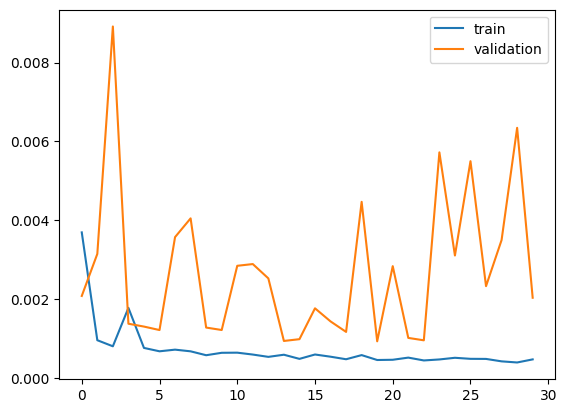

In [5]:
# 6. Create Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Dropout

# 3 layers of LSTM with 50 units
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# add early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)

# train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1, callbacks=[early_stopping])

# plot the training loss and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()


# 7. Prediction on Train Set

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Mean Squared Error on Training Data: 11.297617067178315
Root Mean Squared Error on Training Data: 3.361192804225654
Mean Absolute Percentage Error on Training Data: 4.677345195035087


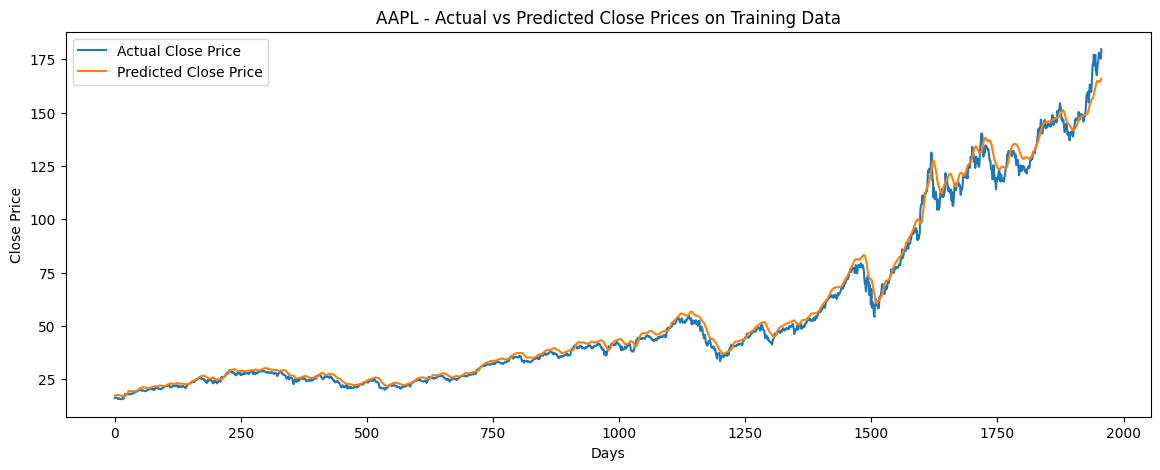

In [11]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Fit a separate scaler for the 'Close' prices
close_scaler = MinMaxScaler()
close_scaler.fit(df[['Close']])  # Fit the scaler on the original 'Close' prices

# Predict on training data
y_pred = model.predict(X_train)

# Inverse the normalization for predicted and actual values
y_pred_inv = close_scaler.inverse_transform(y_pred)
y_train_inv = close_scaler.inverse_transform(y_train.reshape(-1, 1))

# calculate mean squared error on training data
mse_train = mean_squared_error(y_train_inv, y_pred_inv)
print('Mean Squared Error on Training Data:', mse_train)

# calculate root mean squared error on training data
rmse_train = np.sqrt(mse_train)
print('Root Mean Squared Error on Training Data:', rmse_train)

# calculate mape on training data
mape_train = np.mean(np.abs((y_train_inv - y_pred_inv) / y_train_inv)) * 100
print('Mean Absolute Percentage Error on Training Data:', mape_train)

# Plot the actual and predicted values
plt.figure(figsize=(14, 5))
plt.plot(y_train_inv, label='Actual Close Price')
plt.plot(y_pred_inv, label='Predicted Close Price')
plt.title('AAPL - Actual vs Predicted Close Prices on Training Data')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()




# 8. Prediction on Test Set

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


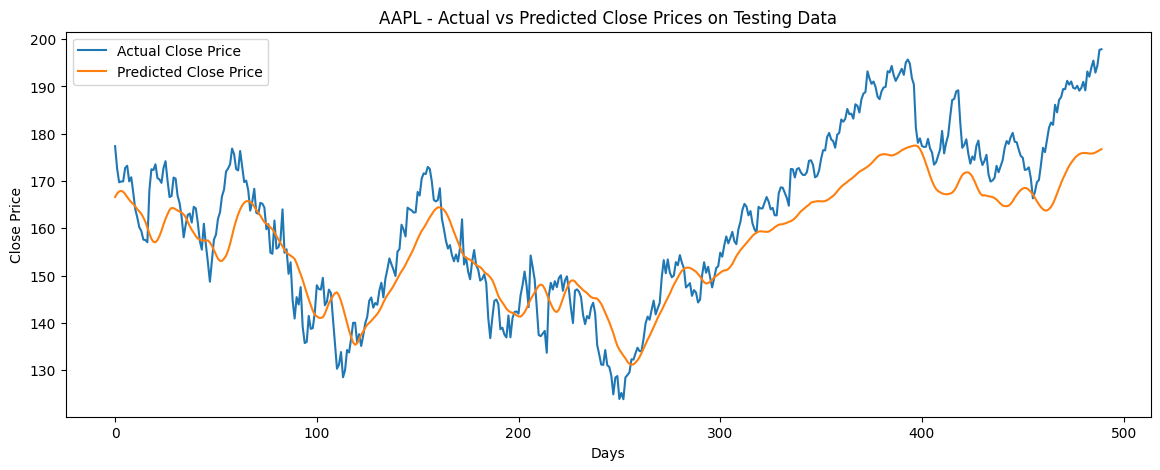

Mean Squared Error on Testing Data: 80.7560475828665
Root Mean Squared Error on Testing Data: 8.986436868017629
Mean Absolute Percentage Error on Testing Data: 4.353343120149464%


In [10]:
from sklearn.metrics import mean_squared_error

# Select the last 250 rows from the test data
# X_test_last_250 = X_test[-250:]
# y_test_last_250 = y_test[-250:]
X_test_last_250 = X_test
y_test_last_250 = y_test

# Predict on the last 250 rows of testing data
y_pred_test = model.predict(X_test_last_250)

# Inverse the normalization for predicted and actual values
y_pred_test_inv = close_scaler.inverse_transform(y_pred_test)
y_test_last_250_inv = close_scaler.inverse_transform(y_test_last_250.reshape(-1, 1))

# Plot the actual and predicted values on testing data
plt.figure(figsize=(14, 5))
plt.plot(y_test_last_250_inv, label='Actual Close Price')
plt.plot(y_pred_test_inv, label='Predicted Close Price')
plt.title('AAPL - Actual vs Predicted Close Prices on Testing Data')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Calculate the Mean Squared Error on testing data
mse = mean_squared_error(y_test_last_250_inv, y_pred_test_inv)
print(f'Mean Squared Error on Testing Data: {mse}')

# Calculate the Root Mean Squared Error (RMSE) on testing data
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error on Testing Data: {rmse}')

# Calculate the Mean Absolute Percentage Error (MAPE) on testing data
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test_last_250_inv, y_pred_test_inv)
print(f'Mean Absolute Percentage Error on Testing Data: {mape}%')